In [14]:
from sklearn import datasets

import numpy as np
from numpy import inf

from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### Load Data

In [15]:
X = np.loadtxt("res/exp.Ketamine-Kallisto.txt", delimiter='\t',
               skiprows=1, usecols=range(1,11))
X = X.T

n_samples = X.shape[0]
n_features = X.shape[1]

print("Samples:", n_samples)
print("Features:", n_features)

y = np.genfromtxt("res/exp.Ketamine-Kallisto.txt", delimiter='\t',
                  dtype=np.str, skip_footer=(n_features), usecols=range(1, 11))

Samples: 10
Features: 36963


### Pre-Processing

In [16]:
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
X[np.isnan(X)] = 0

<ipython-input-16-9d67efa17e77>:1: RuntimeWarning: invalid value encountered in true_divide
  X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)


## PCA | Two Principal Components

In [17]:
pca = PCA(n_components=2)
pca.fit(X)
X_new = pca.transform(X)

print("Retained Variance per Principal Component:\n", pca.explained_variance_ratio_)

print("Samples:", X_new.shape[0])
print("Features:", X_new.shape[1])

Retained Variance per Principal Component:
 [0.3018829  0.14826949]
Samples: 10
Features: 2


### 2D Plot

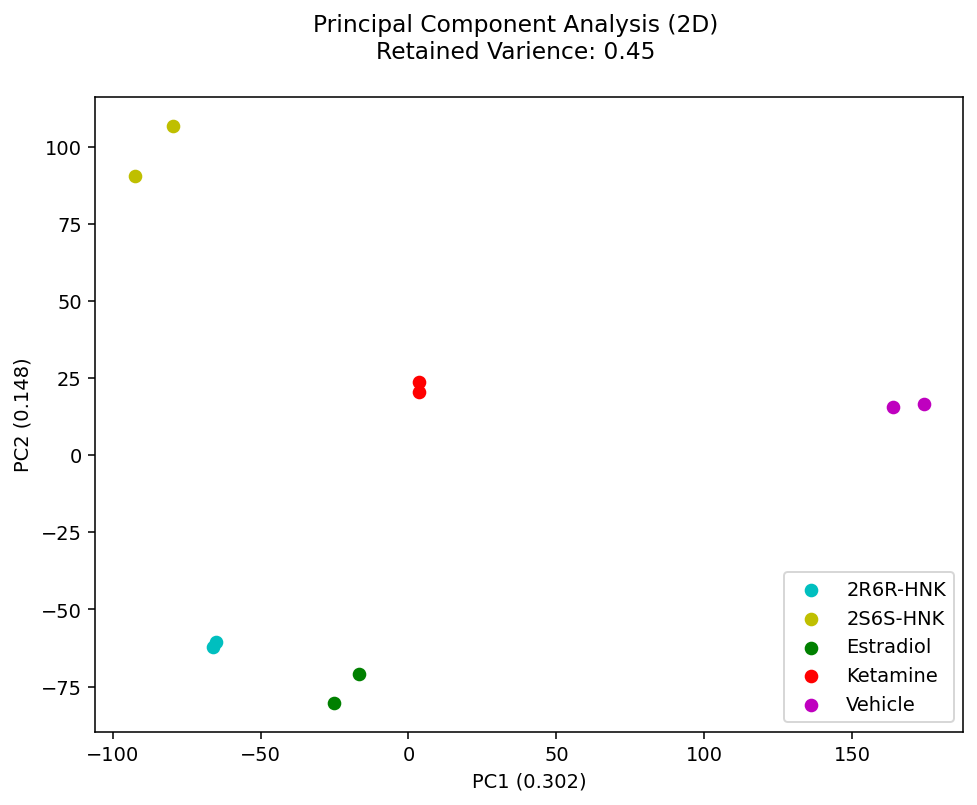

In [18]:
fig = plt.figure(num=None, figsize=(8, 6), dpi=140, facecolor='w', edgecolor='k')

unique_lables = np.unique(y)
colors = ['c', 'y', 'g', 'r', 'm', 'b']
for ii in range(unique_lables.shape[0]):
    this_group = np.where(y == unique_lables[ii])
    plt.scatter(X_new[this_group, 0], X_new[this_group, 1],
                color=colors[ii % len(colors)], label=unique_lables[ii])

plt.legend(loc="lower right")
fig.suptitle('Principal Component Analysis (2D)\nRetained Varience: ' +
             np.str(np.around(np.sum(pca.explained_variance_ratio_), 3)))
plt.xlabel("PC1 (" + np.str(np.around(pca.explained_variance_ratio_[0], 3)) + ")")
plt.ylabel("PC2 (" + np.str(np.around(pca.explained_variance_ratio_[1], 3)) + ")")
fig.savefig('PCA_2D.jpg')

## PCA | Three Principal Components

In [19]:
pca = PCA(n_components=3)
pca.fit(X)
X_new = pca.transform(X)

print("Retained Variance per Principal Component:\n", pca.explained_variance_ratio_)

print("Samples:", X_new.shape[0])
print("Features:", X_new.shape[1])

Retained Variance per Principal Component:
 [0.3018829  0.14826949 0.11663113]
Samples: 10
Features: 3


### 3D Plot

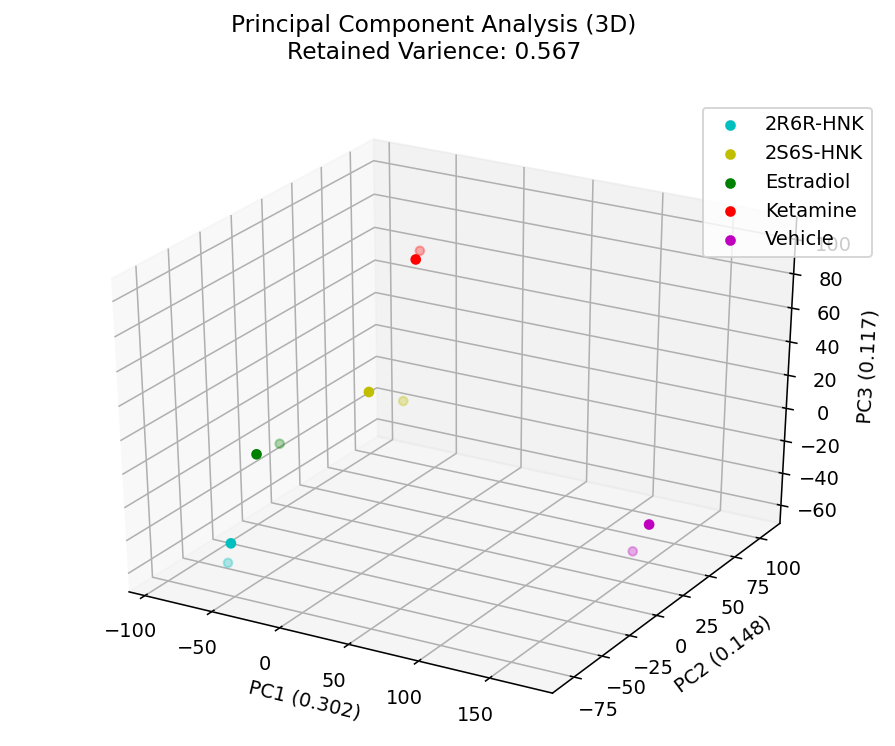

In [20]:
fig = plt.figure(num=None, figsize=(8, 6), dpi=140, facecolor='w', edgecolor='k')
ax = plt.axes(projection='3d')

unique_lables = np.unique(y)
colors = ['c', 'y', 'g', 'r', 'm', 'b']
for ii in range(unique_lables.shape[0]):
    this_group = np.where(y == unique_lables[ii])
    ax.scatter3D(X_new[this_group, 0], X_new[this_group, 1], X_new[this_group, 2],
                 color=colors[ii % len(colors)], label=unique_lables[ii])

ax.legend(loc="upper right")
fig.suptitle('Principal Component Analysis (3D)\nRetained Varience: ' +
             np.str(np.around(np.sum(pca.explained_variance_ratio_), 3)))
ax.set_xlabel("PC1 (" + np.str(np.around(pca.explained_variance_ratio_[0], 3)) + ")")
ax.set_ylabel("PC2 (" + np.str(np.around(pca.explained_variance_ratio_[1], 3)) + ")")
ax.set_zlabel("PC3 (" + np.str(np.around(pca.explained_variance_ratio_[2], 3)) + ")")
fig.savefig('PCA_3D.jpg')

## PCA | One Principal Components

In [21]:
pca = PCA(n_components=1)
pca.fit(X)
X_new = pca.transform(X)

print("Retained Variance per Principal Component:\n", pca.explained_variance_ratio_)

print("Samples:", X_new.shape[0])
print("Features:", X_new.shape[1])

Retained Variance per Principal Component:
 [0.3018829]
Samples: 10
Features: 1


### 1D Plot

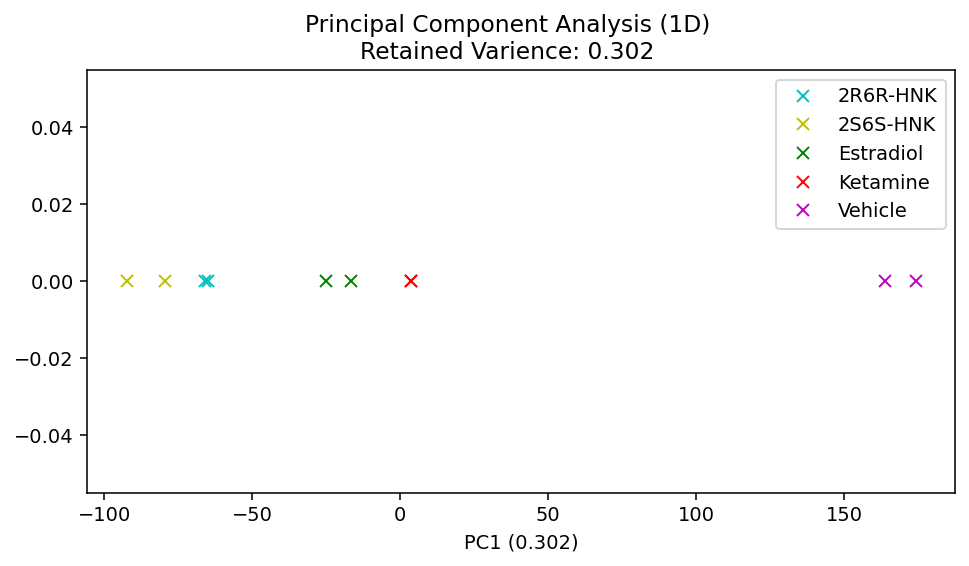

In [22]:
fig = plt.figure(num=None, figsize=(8, 4), dpi=140, facecolor='w', edgecolor='k')

unique_lables = np.unique(y)
colors = ['c', 'y', 'g', 'r', 'm', 'b']
for ii in range(unique_lables.shape[0]):
    this_group = np.where(y == unique_lables[ii])
    val = 0. # this is the value where you want the data to appear on the y-axis.
    plt.plot(X_new[this_group], np.zeros(X_new[this_group].shape[0]), 'x',
             color=colors[ii % len(colors)], label=unique_lables[ii])

plt.legend(loc="upper right")
fig.suptitle('Principal Component Analysis (1D)\nRetained Varience: ' +
             np.str(np.around(np.sum(pca.explained_variance_ratio_), 3)))
plt.xlabel("PC1 (" + np.str(np.around(pca.explained_variance_ratio_[0], 3)) + ")")
fig.savefig('PCA_1D.jpg')

## PCA | Intrinsic Dimensionality

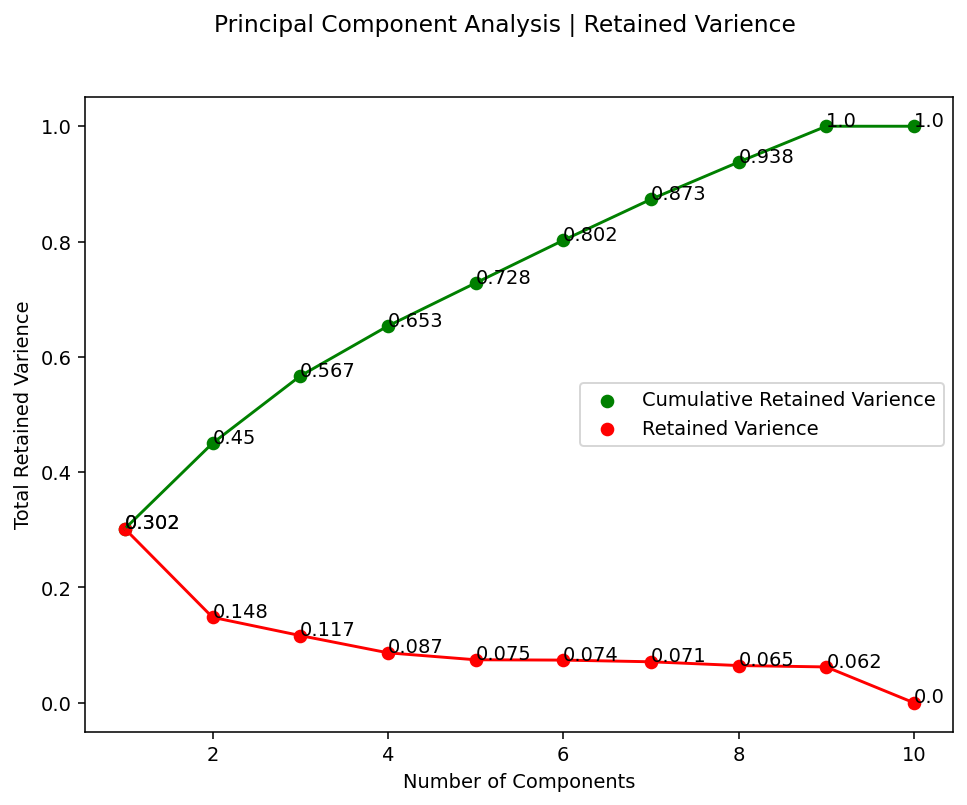

In [23]:
tests = 10

ret_var = np.zeros(tests)
n_comps = np.zeros(tests)

for ii in (range(tests)):
    pca = PCA(n_components=(ii + 1))
    pca.fit(X)

    n_comps[ii] = pca.n_components_
    ret_var[ii] = np.sum(pca.explained_variance_ratio_)

fig = plt.figure(num=None, figsize=(8, 6), dpi=140, facecolor='w', edgecolor='k')
plt.plot(n_comps, ret_var, color='g')
plt.plot(n_comps, pca.explained_variance_ratio_, color='r')


plt.scatter(n_comps, ret_var, color='g', label="Cumulative Retained Varience")
for ii, txt in enumerate(ret_var):
    plt.annotate(np.round(ret_var[ii], 3), (n_comps[ii], ret_var[ii]))
    
plt.scatter(n_comps, pca.explained_variance_ratio_, color='r', label="Retained Varience")
for ii, txt in enumerate(pca.explained_variance_ratio_):
    plt.annotate(np.round(pca.explained_variance_ratio_[ii], 3),
                 (n_comps[ii], pca.explained_variance_ratio_[ii]))

plt.legend(loc="center right")
fig.suptitle('Principal Component Analysis | Retained Varience')
plt.xlabel("Number of Components")
plt.ylabel("Total Retained Varience")
fig.savefig('PCA_RV.jpg')